In [1]:
import pandas as pd

In [4]:
df = pd.read_parquet('/Users/harshitgupta/Desktop/vs /VS-Data-Den/dates_grouped_data.parquet')

In [5]:
df.tail()

,PTNR_RM_CODE,WEEK,DATE_FIELD,SALES,FLAG
8563,50001145.0,51,2023-01-16,4100.67,Active
8564,50001145.0,51,2023-01-17,3619.68,Active
8565,50001145.0,51,2023-01-18,3607.62,Active
8566,50001145.0,51,2023-01-19,3199.11,Active
8567,50001145.0,51,2023-01-20,4456.67,Active


In [6]:
df.plot()

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x12156cca0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal -2500057.25 converts to -4875-01-28T18:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -2500057.25 converts to -4875-01-28T18:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>

In [7]:
df['PTNR_RM_CODE'] = df['PTNR_RM_CODE'].astype(str)

<Axes: >

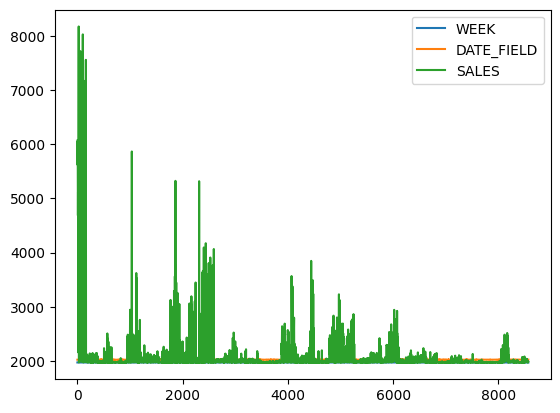

In [8]:
df.plot()

In [9]:
df.head()

,PTNR_RM_CODE,WEEK,DATE_FIELD,SALES,FLAG
0,0.0,1,2021-01-31,1497279.48,Active
1,0.0,1,2021-02-01,1352352.29,Active
2,0.0,1,2021-02-02,1336891.59,Active
3,0.0,1,2021-02-03,1333770.96,Active
4,0.0,1,2021-02-04,1468008.14,Active


In [10]:
df.head()

,PTNR_RM_CODE,WEEK,DATE_FIELD,SALES,FLAG
0,0.0,1,2021-01-31,1497279.48,Active
1,0.0,1,2021-02-01,1352352.29,Active
2,0.0,1,2021-02-02,1336891.59,Active
3,0.0,1,2021-02-03,1333770.96,Active
4,0.0,1,2021-02-04,1468008.14,Active


In [11]:
df_final = df[['DATE_FIELD','SALES','FLAG','PTNR_RM_CODE']].rename({'DATE_FIELD':'ds','SALES':'y'},axis='columns')

In [12]:
df_final.head()

,ds,y,FLAG,PTNR_RM_CODE
0,2021-01-31,1497279.48,Active,0.0
1,2021-02-01,1352352.29,Active,0.0
2,2021-02-02,1336891.59,Active,0.0
3,2021-02-03,1333770.96,Active,0.0
4,2021-02-04,1468008.14,Active,0.0


In [13]:
from prophet import Prophet

/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
df_final.set_index('PTNR_RM_CODE', inplace=True)
regional_masters = df_final.groupby(level='PTNR_RM_CODE')

In [16]:
regional_masters.head()

,ds,y,FLAG
PTNR_RM_CODE,,,
0.0,2021-01-31,1497279.48,Active
0.0,2021-02-01,1352352.29,Active
0.0,2021-02-02,1336891.59,Active
0.0,2021-02-03,1333770.96,Active
0.0,2021-02-04,1468008.14,Active
...,...,...,...
50001145.0,2023-02-04,3288.48,Active
50001145.0,2023-02-05,6073.12,Active
50001145.0,2023-02-06,4062.04,Active


In [17]:
for regional_master in regional_masters.groups:
    group = regional_masters.get_group(regional_master)
    group_sorted = group.sort_values(by='ds')
    

    split_index = int(0.6 * len(group_sorted))  
    
  
    train = group_sorted.iloc[:split_index]
    test = group_sorted.iloc[split_index:]
    
    print(train.shape)

(97, 3)
(132, 3)
(74, 3)
(92, 3)
(88, 3)
(82, 3)
(146, 3)
(99, 3)
(126, 3)
(26, 3)
(28, 3)
(1, 3)
(67, 3)
(102, 3)
(82, 3)
(104, 3)
(37, 3)
(168, 3)
(123, 3)
(141, 3)
(86, 3)
(21, 3)
(114, 3)
(20, 3)
(24, 3)
(91, 3)
(9, 3)
(130, 3)
(8, 3)
(163, 3)
(24, 3)
(141, 3)
(40, 3)
(29, 3)
(103, 3)
(43, 3)
(150, 3)
(135, 3)
(25, 3)
(44, 3)
(116, 3)
(127, 3)
(51, 3)
(142, 3)
(45, 3)
(101, 3)
(39, 3)
(129, 3)
(76, 3)
(40, 3)
(34, 3)
(54, 3)
(10, 3)
(59, 3)
(121, 3)
(45, 3)
(90, 3)
(36, 3)
(93, 3)
(63, 3)
(63, 3)
(34, 3)
(16, 3)
(31, 3)
(66, 3)
(73, 3)
(30, 3)
(33, 3)
(15, 3)
(29, 3)
(42, 3)


In [18]:
target = pd.DataFrame()

In [ ]:
for regional_master in regional_masters.groups:
    group = regional_masters.get_group(regional_master)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)  
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+regional_master})
    
    target = pd.merge(
    target,
    forecast.set_index('ds').add_suffix('_' + regional_master),
    how='outer',
    left_index=True,
    right_index=True
)
     

In [20]:
from sklearn.metrics import mean_absolute_percentage_error


In [21]:
mape_dict = {}
for regional_master in regional_masters.groups:
    # Get the test data for the current regional master
    group = regional_masters.get_group(regional_master)
    test = group.iloc[split_index:]  # Assuming split_index is defined outside the loop
    
    # Extract forecasted values for the test period
    forecasted_values = target['yhat_' + regional_master].loc[test.index]
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(test['y'], forecasted_values)
    
    # Store the MAPE in the dictionary
    mape_dict[regional_master] = mape

KeyError: 'yhat_0.0'

In [ ]:
overall_mape = sum(mape_dict.values()) / len(mape_dict)

In [ ]:
overall_mape

In [37]:
target.columns

Index(['trend_0.0', 'yhat_lower_0.0', 'yhat_upper_0.0', 'trend_lower_0.0',
       'trend_upper_0.0', 'additive_terms_0.0', 'additive_terms_lower_0.0',
       'additive_terms_upper_0.0', 'yearly_0.0', 'yearly_lower_0.0',
       ...
       'yhat_upper_50001297.0', 'trend_lower_50001297.0',
       'trend_upper_50001297.0', 'additive_terms_50001297.0',
       'additive_terms_lower_50001297.0', 'additive_terms_upper_50001297.0',
       'multiplicative_terms_50001297.0',
       'multiplicative_terms_lower_50001297.0',
       'multiplicative_terms_upper_50001297.0', 'yhat_50001297.0_50001297.0'],
      dtype='object', length=1059)

In [52]:
yhat_columns = [col for col in target.columns if col.startswith('yhat_')]

In [53]:
target = target[yhat_columns]

In [40]:
pd.concat([df_final.set_index('ds').query("PTNR_REGIONAL_MASTER_CD=='0.0'")['y'],target['yhat_0.0']],axis=1).plot()



KeyError: 'yhat_0.0'

In [41]:
import matplotlib.pyplot as plt

In [57]:
def plot_sales(regional_master_cd, train_sales, test_sales, predicted_sales):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sales.index, train_sales.values, label='Train Sales', color='blue')
    plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
    plt.plot(predicted_sales.index, predicted_sales.values, label='Predicted Sales', color='red')
    plt.title(f'Sales Data for Regional Master Code {regional_master_cd}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


In [54]:
regional_master_cd = '0.0'  

In [55]:
train_sales = df_final[df_final['PTNR_REGIONAL_MASTER_CD'] == regional_master_cd].set_index('ds').loc[train['ds'], 'y']
test_sales = df_final[df_final['PTNR_REGIONAL_MASTER_CD'] == regional_master_cd].set_index('ds').loc[test['ds'], 'y']

In [59]:
predicted_sales.reset_index(drop=True, inplace=True)

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x12de20ac0>.

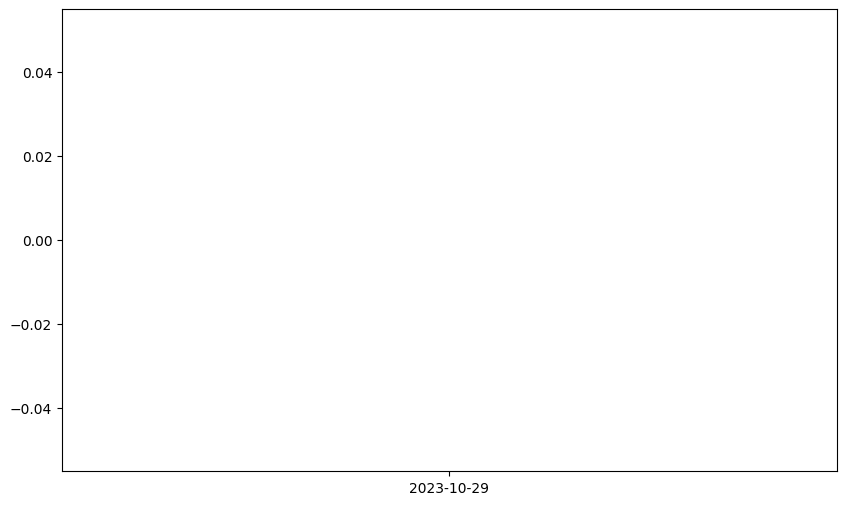

In [61]:
plot_sales(regional_master_cd, train_sales, test_sales, predicted_sales)